# **Are classification methods effective at identifying the edibility of mushrooms based on morphology, and which characteristics prove the most influential?**

## **Contents**

1. Introduction
2. Dependencies
3. Data Ingestion & Cleaning
4. Data Preparation
5. Modelling
6. Results
7. Conclusions
8. Bibliography/References

##**1. Introduction**

### **Background**

Mushrooms have long been considered an important protein source, as well as being revered for their medicinal properties (Kumar, 2015; Wasser, 2010). For this reason, foraging has become enjoyable pastime for many, supplementing diets sustainably and at low cost (González et al., 2020; Marquina et al., 2022; Svanberg and Lindh, 2019).

With an estimated 1000 poisonous mushroom species across the world, foraging can be risky (He et al. 2022; Wennig et al., 2020). Often, foragers rely on descriptions provided by field guides to make distinctions between edible and poisonous varieties (Stephenson, 2022; Pouliot and May, 2021; Bunyard and Lynch, 2020). However, these guides are often difficult to navigate, making foraging a cumbersome process.

To address this problem, the feasibility of utilising machine learning classification methods in determining the edibility of mushrooms is explored. Additionally, the most important predictors of mushroom edibility are identified. The hypothesis investigated was ‘machine learning classification methods can effectively determine the edibility of mushrooms based on their morphological characteristics’.



##**2. Data**

Data for this project was sourced from the UC Irvine machine learning repository (1987) and is available via the following link: https://archive.ics.uci.edu/dataset/73/mushroom

As per the documentation, the dataset contains information about the physical and environmental features of 23 species of mushrooms from the genera *Agaricus* and *Lepiota*, along with a classification of whether the mushroom is edible or poisonous.

**Target**
* **poisonous** - e = edible, p = poisonous

**Features**
*   **cap-shape** - b = bell, c = conical, x = convex, f = flat, k = knobbed, s = sunken
*   **cap-surface** - f = fibrous, g = grooves, y = scaly, s = smooth
* **cap-color** - n = brown, b = buff, c = cinnamon, g = grey, r = green, p = pink, u = purple, e = red, w = white, y = yellow
* **bruises** - t = bruises, f = no bruises
* **odor** - a = almond, l = anise, c = creosote, y = fishy, f = foul, m = musty, n = none, p = pungent, s = spicy
* **gill-attachment** - a = attached, d = descending, f = free, n = notched
* **gill-spacing** - c = close, w = crowded, d = distant
* **gill_size** - b = broad, n = narrow
* **gill-color** - k = black, n = brown, b = buff, h = chocolate, g = grey, r = green, o = orange, p = pink, u = purple, e = red, w = white, y = yellow
* **stalk-shape** - e = enlarging, t = tapering
* **stalk-root** - b = bulbous, c = club, u = cup, e = equal, z = rhizomorphs, r = rooted, ? = missing
* **stalk-surface-above-ring** - f = fibrous, y = scaly, k = silky, s = smooth
* **stalk-surface-below-ring** - f = fibrous, y = scaly, k = silky, s = smooth
* **stalk-color-above-ring** - n = brown, b = buff, c = cinnamon, g = grey, o = orange, p = pink, e = red, w = white, y = yellow
* **stalk-color-below-ring** - n = brown, b = buff, c = cinnamon, g = grey, o = orange, p = pink, e = red, w = white, y = yellow
* **veil-type** - p = partial, u = universal
* **veil-color** - n = brown, o = orange, w = white, y = yellow
* **ring-number** - n = none, o = one, t = two
* **ring-type** - c = cobwebby, e = evanescent, f = flaring, l = large, n = none, p = pendant, s = sheathing, z = zone
* **spore-print-color** - k = black, n = brown, b = buff, h = chocolate, r = green, o = orange, u = purple, w = white, y = yellow
* **population** - a = abundant, c = clustered, n = numerous, s = scattered, v = several, y = solitary
* **habitat** - g = grasses, l = leaves, m = meadows, p = paths, u = urban, w = waste, d = woods






## **3. Dependencies**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.preprocessing
import sklearn.model_selection
import sklearn.linear_model
import sklearn.tree
import sklearn.neural_network
import sklearn.metrics
import sklearn.model_selection
import sklearn.inspection

##**4. Data Ingestion & Cleaning**

### Ingestion

Data is read into a Pandas DataFrame directly from the UC Irvine machine learning repository (1987).

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/static/public/73/data.csv')

Verify that the dataset has been successfully ingested.

In [ ]:
print(df.head())
print('Total observations: ' + str(len(df)))

  cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  gill-size gill-color stalk-shape  ... stalk-color-above-ring  \
0         n          k           e  ...                      w   
1         b          k           e  ...                      w   
2         b          n           e  ...                      w   
3         n          n           e  ...                      w   
4         b          k           t  ...                      w   

  stalk-color-below-ring veil-type veil-color ring-number ring-type  \
0                      w         p          w           o

The data has successfully been ingested into the pipeline and has 8124 total observations across 23 variables.

To improve understanding and readibility of figures, actual values are mapped to the encoded values.

In [ ]:
map = {
    'cap-shape': {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'},
    'cap-surface': {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'},
    'cap-color': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'grey', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'bruises': {'t': 'bruises', 'f': 'no bruises'},
    'odor': {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'},
    'gill-attachment': {'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'},
    'gill-spacing': {'c': 'close', 'w': 'crowded', 'd': 'distant'},
    'gill-size': {'b': 'broad', 'n': 'narrow'},
    'gill-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-shape': {'e': 'enlarging', 't': 'tapering'},
    'stalk-root': {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted'},
    'stalk-surface-above-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-surface-below-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-color-above-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'grey', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-color-below-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'grey', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'veil-type': {'p': 'partial', 'u': 'universal'},
    'veil-color': {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'},
    'ring-number': {'n': 'none', 'o': 'one', 't': 'two'},
    'ring-type': {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'},
    'spore-print-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'},
    'population': {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'y': 'solitary'},
    'habitat': {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'},
    'poisonous': {'e': 'edible', 'p': 'poisonous'}
}


df.replace(map, inplace=True)


To improve the quality of visualiations, hyphens are removed from the feature names and the first letter capitalised.

In [ ]:
def transform_column_name(name):
    name = name.replace('-', ' ')
    return name.capitalize()

df.columns = [transform_column_name(col) for col in df.columns]

### **Data Cleaning**

Initial data quality checks at this stage are based around the six dimensions of data quality outlined by the Government Data Quality Hub (2020).
<br>
<br>

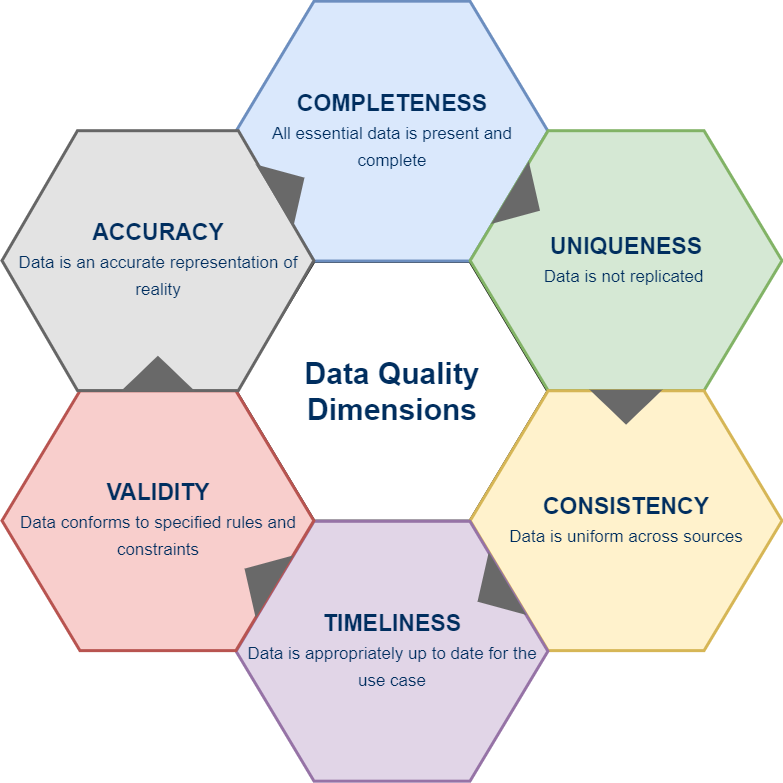

**Fig 1.** The six dimensions of data quality (Government Data Quality Hub, 2020).

<br>
<br>

Due to the nature of the dataset, the following code does not make explicit checks against the timeliness, accuracy, and consistency dimensions. Instead the below logic describes the checks against these dimensions:
* **Timeliness** - Although the dataset was originally donated to the UCI Machine Learning Repository in 1987, the information presented is still relevant for the use case at present. Due to evolutionary timescales, we would not expect the physical and biological attributes of mushrooms to have changed significantly over a period of 37 years and therefore the information in this dataset is still relevant for this classification task (Varga *et al*, 2019). As such, the data meets the timeliness dimension of data quality.   
* **Accuracy** - Despite holding a degree in Biology, I am not a domain expert in the field of mycology and as such it is difficult to determine exactly whether the dataset is an accurate representation of reality. However, given that the dataset was initially compiled by experts in the field, and has since been cited by 77 research papers which are subject to scrutiny and peer review, I have made the reasonable assumption that the dataset is an accurate representation of reality.
* **Consistency** - The dataset was originally donated to the UCI Machine Learning Repository and is therefore the authoritative source in this case. However, to ensure consistency between sources, I performed manual checks of this dataset with the [Kaggle dataset](https://www.kaggle.com/datasets/uciml/mushroom-classification) and the [OpenML dataset](https://www.openml.org/search?type=data&sort=runs&id=24&status=active). Both datasets are consistent with the dataset that I am using in this case. Therefore, the data meets the criteria of the consistency dimension.

**Completeness**

Carry out a check to determine how many values are null from each column.

In [ ]:
cols = list(df)

print('Total records: ' + str(len(df)))
for col in cols:
  print(col + ' - null values: ' + str(df[col].isnull().sum()))

Total records: 8124
Cap shape - null values: 0
Cap surface - null values: 0
Cap color - null values: 0
Bruises - null values: 0
Odor - null values: 0
Gill attachment - null values: 0
Gill spacing - null values: 0
Gill size - null values: 0
Gill color - null values: 0
Stalk shape - null values: 0
Stalk root - null values: 2480
Stalk surface above ring - null values: 0
Stalk surface below ring - null values: 0
Stalk color above ring - null values: 0
Stalk color below ring - null values: 0
Veil type - null values: 0
Veil color - null values: 0
Ring number - null values: 0
Ring type - null values: 0
Spore print color - null values: 0
Population - null values: 0
Habitat - null values: 0
Poisonous - null values: 0


It appears as though the majority of columns are populated and don't contain null values. This is with the exception of the 'stalk-root' column which contains 2480 null values of a total 8124 records, ~31% null.

Looking at the documentation from the [data source](https://archive.ics.uci.edu/dataset/73/mushroom) it appears as though this information is missing - rather than being a meaningful value. Due to this, I have made the decision to drop this column from the dataset. The large number of missing values in the column also means that significant amounts of data are not being lost.

Additionally, no other null values are found for other variables, meaning that dropping the column, rather than rows containing null values, results in less data loss overall.

In [ ]:
df = df.drop(columns='Stalk root')

**Uniqueness**

Performing a check to determine whether there is any duplication of data across the records.

In [ ]:
cols = list(df)
total_obs = len(df)
total_unique = len(df.groupby(cols).count())
full_duplicates = len(df[df.duplicated()])


print('Total observations in the dataset: ' + str(total_obs))
print('Total unique observations in the dataset: ' + str(total_unique))
print('Number of full duplicates: ' + str(full_duplicates))

Total observations in the dataset: 8124
Total unique observations in the dataset: 8124
Number of full duplicates: 0


The data satisifies the criteria of the uniqueness dimension without any transformations applied.

**Validity**

First I will check to ensure the data type of each column is as we expect from the documentation. Each column should be of the type 'str'.

In [ ]:
cols = list(df)

print('Column Types:')
for col in cols:
  print(str(col) + ': ' + str(col.dtype)))

Column Types:
Cap shape: <class 'str'>
Cap surface: <class 'str'>
Cap color: <class 'str'>
Bruises: <class 'str'>
Odor: <class 'str'>
Gill attachment: <class 'str'>
Gill spacing: <class 'str'>
Gill size: <class 'str'>
Gill color: <class 'str'>
Stalk shape: <class 'str'>
Stalk surface above ring: <class 'str'>
Stalk surface below ring: <class 'str'>
Stalk color above ring: <class 'str'>
Stalk color below ring: <class 'str'>
Veil type: <class 'str'>
Veil color: <class 'str'>
Ring number: <class 'str'>
Ring type: <class 'str'>
Spore print color: <class 'str'>
Population: <class 'str'>
Habitat: <class 'str'>
Poisonous: <class 'str'>


The data type in each column matches the expected data type.

Next I will check to ensure that the values in each column match the expected values provided by the documentation.

In [ ]:
cols = list(df)
print('Unique values in the dataset:')
for col in cols:
  print(col + ' unique values:' + str(df[col].unique()))

Unique values in the dataset:
Cap shape unique values:['convex' 'bell' 'sunken' 'flat' 'knobbed' 'conical']
Cap surface unique values:['smooth' 'scaly' 'fibrous' 'grooves']
Cap color unique values:['brown' 'yellow' 'white' 'grey' 'red' 'pink' 'buff' 'purple' 'cinnamon'
 'green']
Bruises unique values:['bruises' 'no bruises']
Odor unique values:['pungent' 'almond' 'anise' 'none' 'foul' 'creosote' 'fishy' 'spicy'
 'musty']
Gill attachment unique values:['free' 'attached']
Gill spacing unique values:['close' 'crowded']
Gill size unique values:['narrow' 'broad']
Gill color unique values:['black' 'brown' 'gray' 'pink' 'white' 'chocolate' 'purple' 'red' 'buff'
 'green' 'yellow' 'orange']
Stalk shape unique values:['enlarging' 'tapering']
Stalk surface above ring unique values:['smooth' 'fibrous' 'silky' 'scaly']
Stalk surface below ring unique values:['smooth' 'fibrous' 'scaly' 'silky']
Stalk color above ring unique values:['white' 'grey' 'pink' 'brown' 'buff' 'red' 'orange' 'cinnamon' 'yell

Expected values from the documentation:
* **cap-shape** - bell, conical, convex, flat, knobbed, sunken
* **cap-surface** - fibrous, grooves, scaly, smooth
* **cap-color** - brown, buff, cinnamon, grey, green, pink, purple, red, white, yellow
* **bruises** - bruises, no bruises
* **odor** - almond, anise, creosote, fishy, foul, musty, none, pungent, spicy
* **gill-attachment** - attached, descending, free, notched
* **gill-spacing** - close, crowded, distant
* **gill_size** - broad, narrow
* **gill-color** - black, brown, buff, chocolate, grey, green, orange, pink, purple, red, white, yellow
* **stalk-shape** - enlarging, tapering
* **stalk-root** - bulbous, club, cup, equal, rhizomorphs, rooted, ?
* **stalk-surface-above-ring** - fibrous, scaly, silky, smooth
* **stalk-surface-below-ring** - fibrous, scaly, silky, smooth
* **stalk-color-above-ring** - brown, buff, cinnamon, grey, orange, pink, red, white, yellow
* **stalk-color-below-ring** - brown, buff, cinnamon, grey, orange, pink, red, white, yellow
* **veil-type** - partial, universal
* **veil-color** - brown, orange, white, yellow
* **ring-number** - none, one, two
* **ring-type** - cobwebby, evanescent, flaring, large, none, pendant, sheathing, zone
* **spore-print-color** - black, brown, buff, chocolate, green, orange, purple, white, yellow
* **population** - abundant, clustered, numerous, scattered, several, solitary
* **habitat** - grasses, leaves, meadows, paths, urban, waste, woods
* **poisonous** - edible, poisonous

A visual check confirms that all of the unique values found within the dataset match the expected values provided by the dataset documentation.

Of note, the following values have no representation in the dataset at all, despite being noted in the documentation:
* **gill-attachment** - descending, notched
* **gill-spacing** - distant
* **veil-type** - universal
* **ring-type** - cobwebby, sheathing, zone

This also leaves the veil-type variable with only a single value across all observations. As this is no longer providing any meaningful value to the analysis I have made the decision to drop the veil-type column to avoid data redundancy.

In [ ]:
df = df.drop(columns='Veil type')

At this stage the data now meets the criteria for the six dimensions of data quality and is prepared for exploratory data analysis (EDA).

### **Exploratory Data Analysis (EDA)**

**Value distributions**

As a first stage in the EDA process, I want to visualise the distributions of observations across the features in the dataset.

Initially using the describe() method on the dataframe allows visualisation of the count of records, the number of unique values, the most frequent value (mode), and the number of occurrences of the mode.

In [ ]:
print(df.describe())

       Cap shape Cap surface Cap color     Bruises  Odor Gill attachment  \
count       8124        8124      8124        8124  8124            8124   
unique         6           4        10           2     9               2   
top       convex       scaly     brown  no bruises  none            free   
freq        3656        3244      2284        4748  3528            7914   

       Gill spacing Gill size Gill color Stalk shape  ...  \
count          8124      8124       8124        8124  ...   
unique            2         2         12           2  ...   
top           close     broad       buff    tapering  ...   
freq           6812      5612       1728        4608  ...   

       Stalk surface below ring Stalk color above ring Stalk color below ring  \
count                      8124                   8124                   8124   
unique                        4                      9                      9   
top                      smooth                  white                

It is clear from this printout that there are some potential imbalances in particular observations (one value dominating the majority of observations). In particular:
* **gill-attachment** - 7914/8124 observations of value 'free'
* **gill-spacing** - 6812/8124 observations of value 'close'
* **veil-color** - 7924/8124 observations of value 'white'
* **ring-number** - 7488/8124 observations of value 'one'

When a feature is dominated by a single value, there is a potential that the feature is redundant and doesn't contribute to the predictive power of the model and it is worth being aware of these. At the current stage though, the features are retained as it is possible that they still hold important information.

To explore the distributions of the categorical variables in more detail I have plotted a series of bar plots. This also helps to identify any values that may be underrepresented in the dataset.

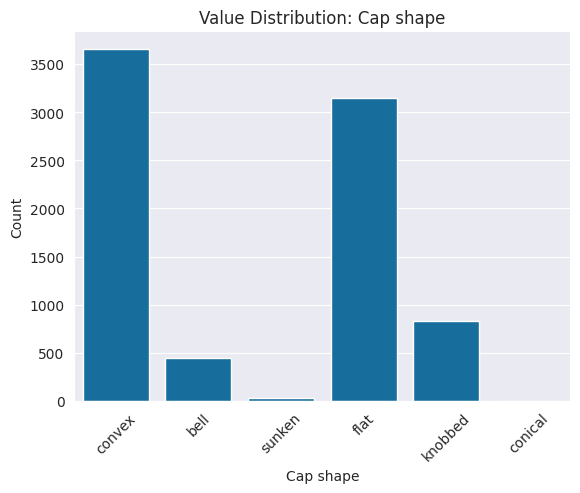

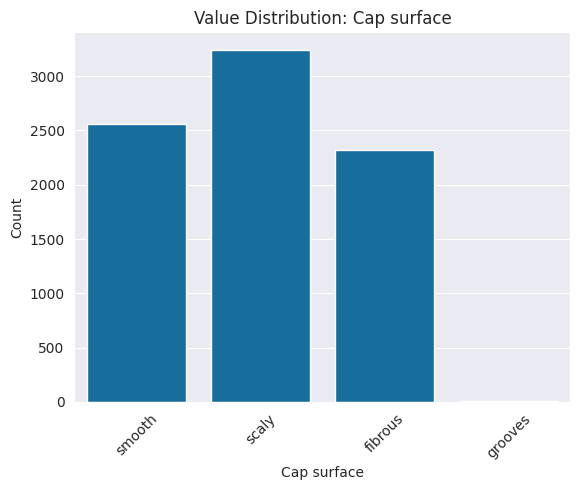

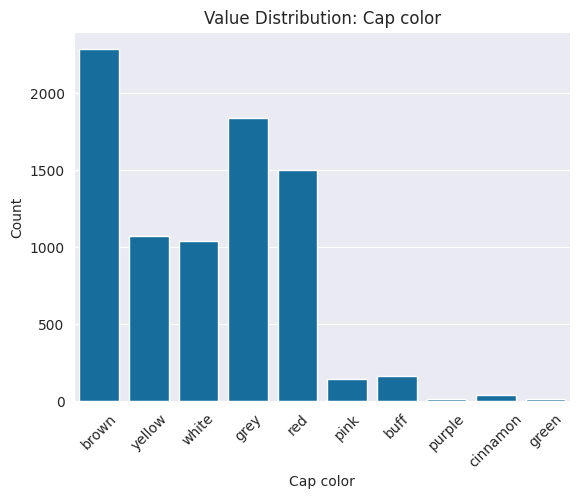

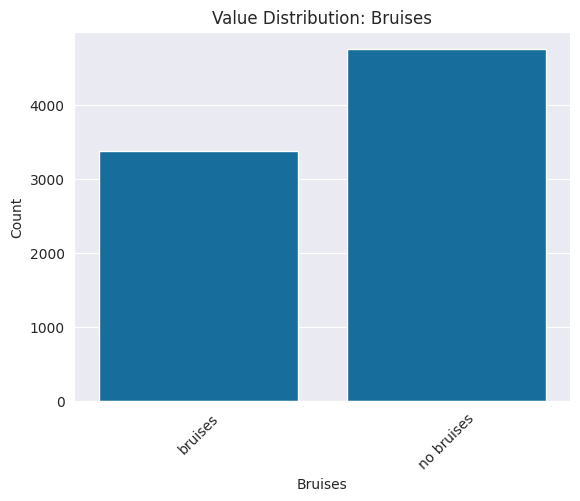

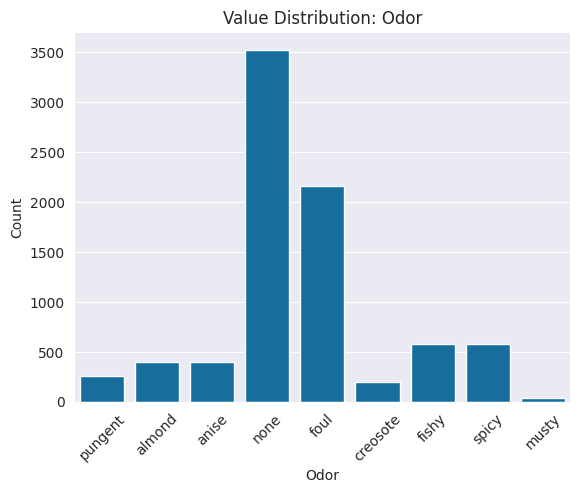

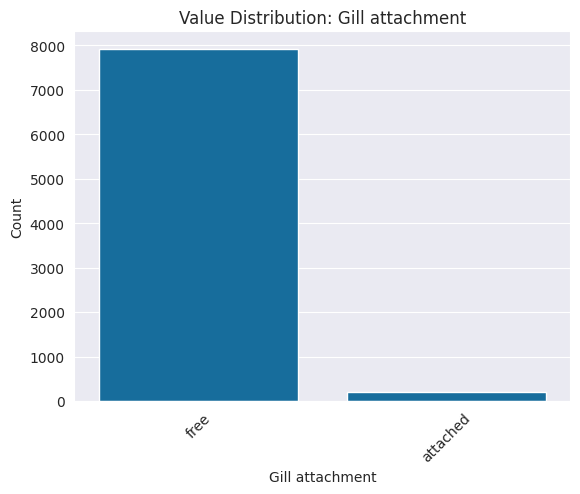

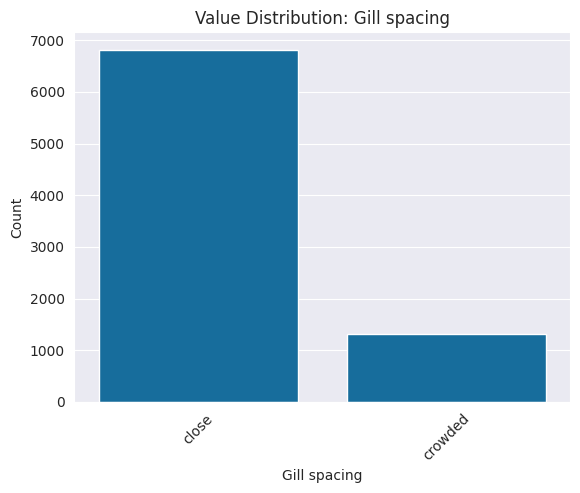

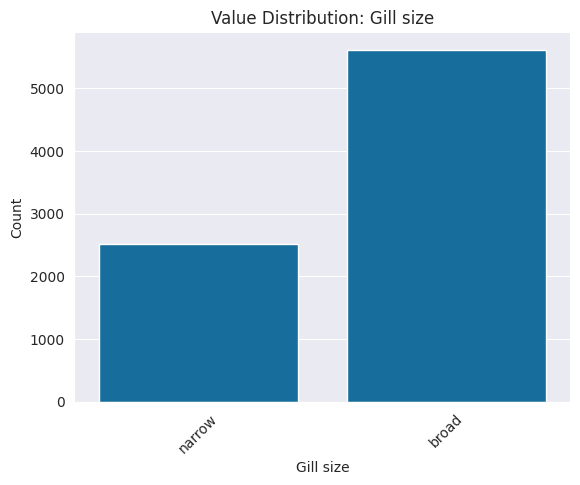

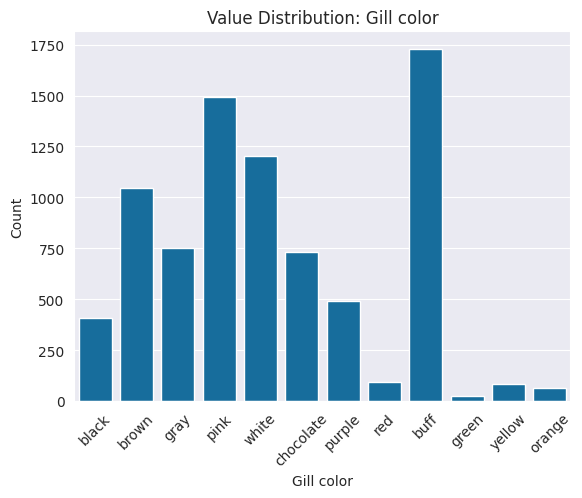

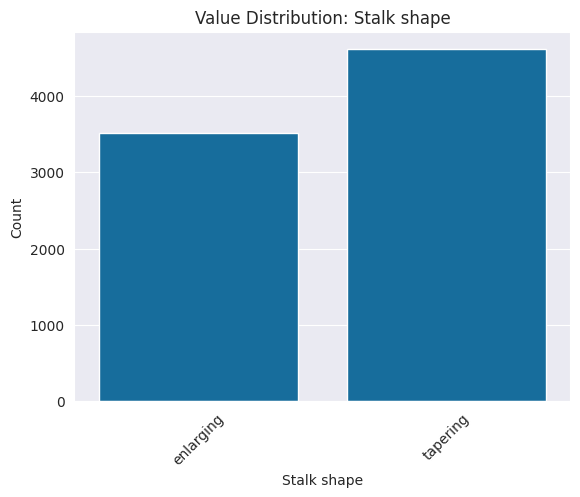

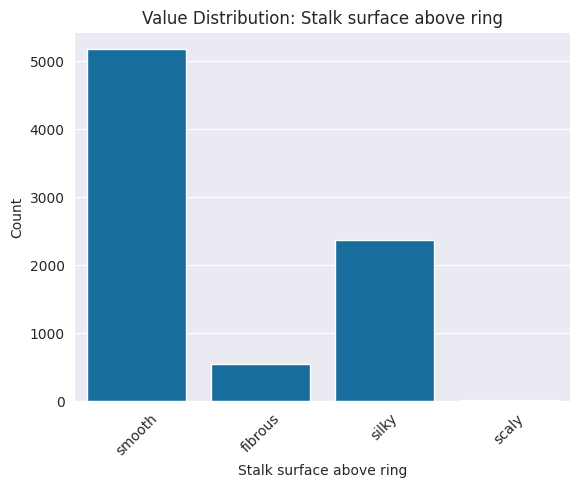

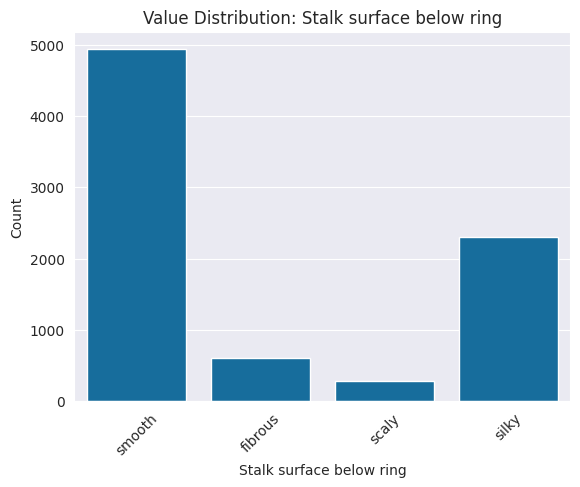

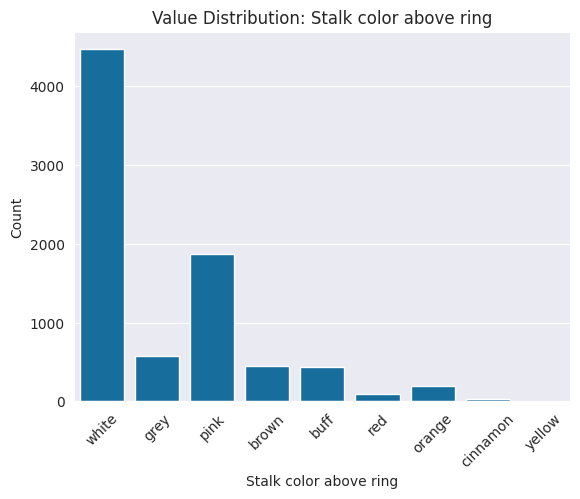

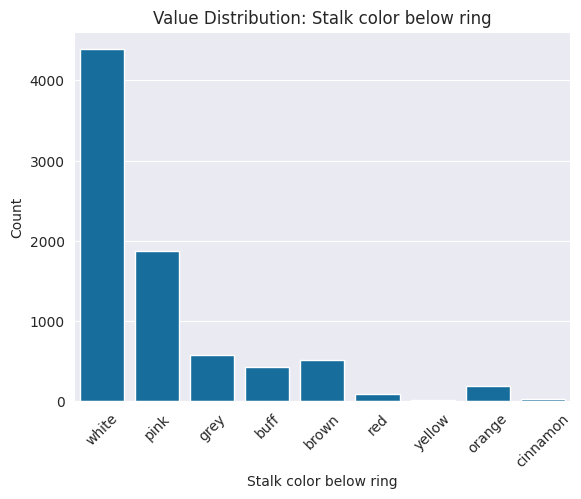

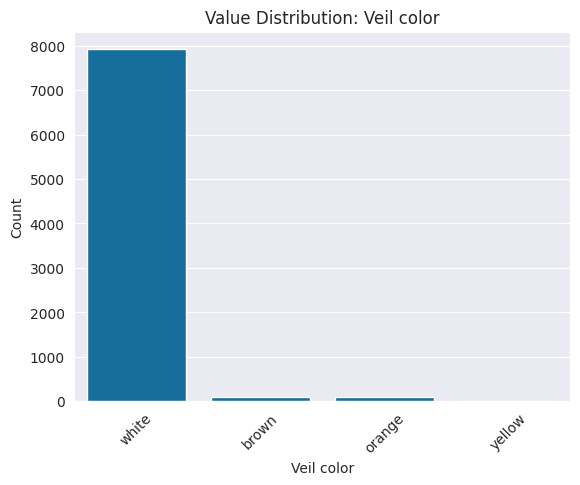

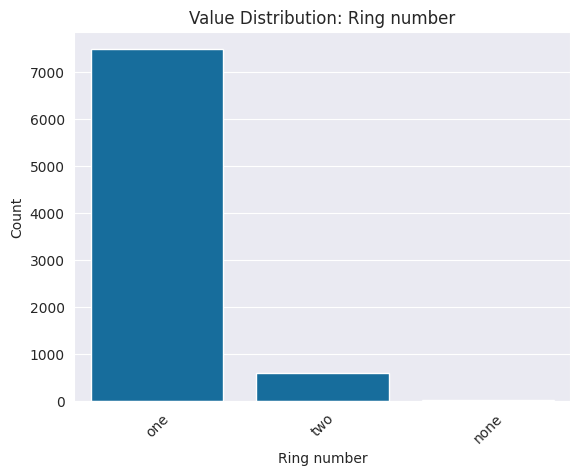

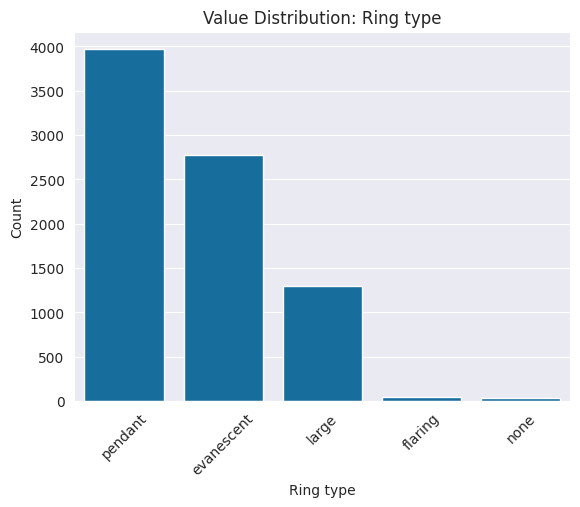

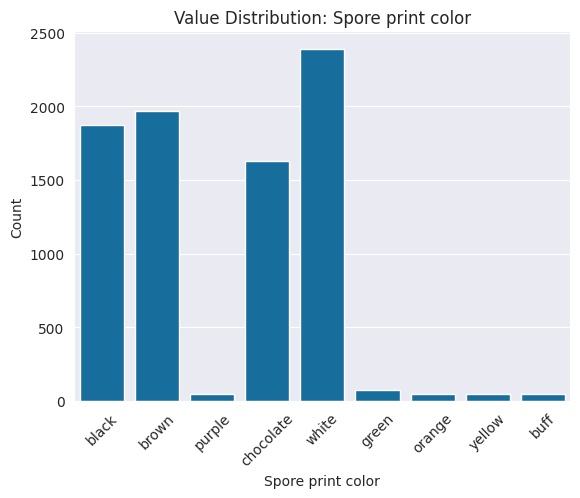

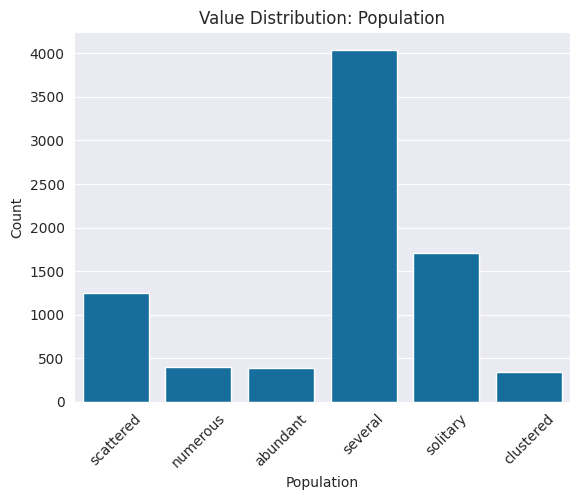

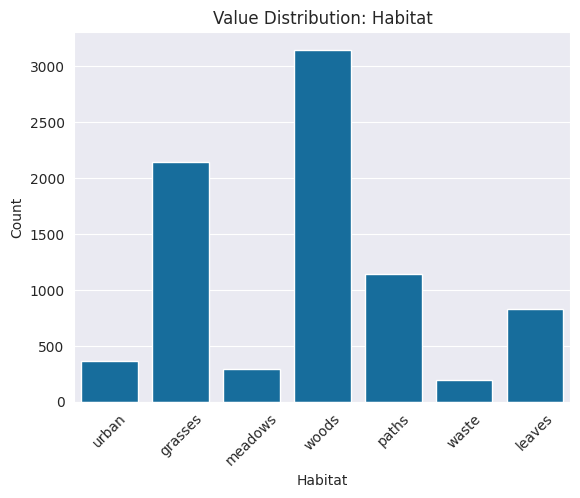

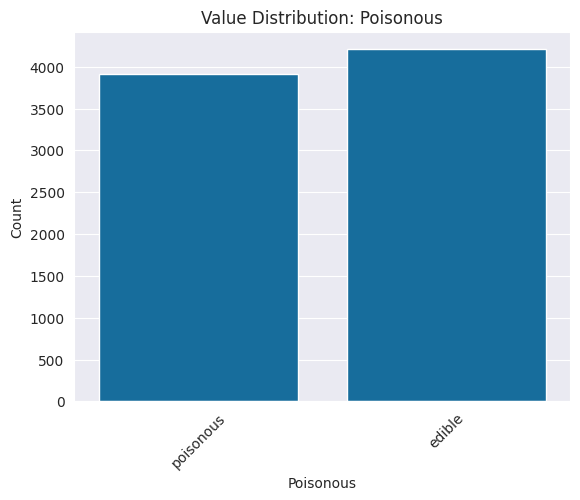

In [ ]:
cols = list(df.columns)

sns.set_style('darkgrid')
sns.set_palette('colorblind')

for col in cols:
  sns.countplot(x=col, data=df)
  plt.xticks(rotation=45)
  plt.title(f'Value Distribution: {col.capitalize()}')
  plt.xlabel(f'{col.capitalize()}')
  plt.ylabel('Count')
  plt.show()

Looking at this output, there are several features with values that appear to be underrepresented in the dataset. For example 'y' in the 'stalk-surface-above-ring' feature, 'r' and 'u' in the cap-color feature, and 'g' in the 'cap-surface' feature.

Again, this will be something to be vigilant for when evaluating model performance as there is a potential that the model may not perform well when presented with the rarer categories.

**Pairwise relationship plots**

To develop an understanding of which features may be of high importance to the model going forwards I have plotted a series of stacked bar charts which show outline how the target variable is distributed across the values in each feature.

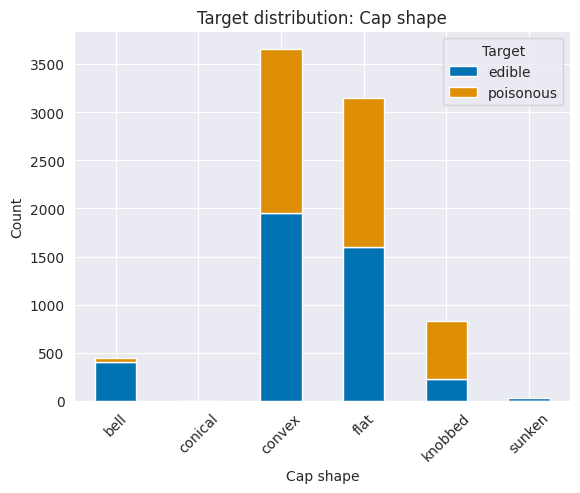

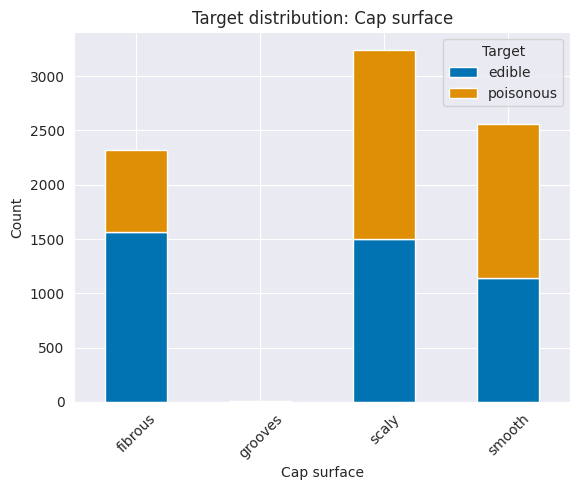

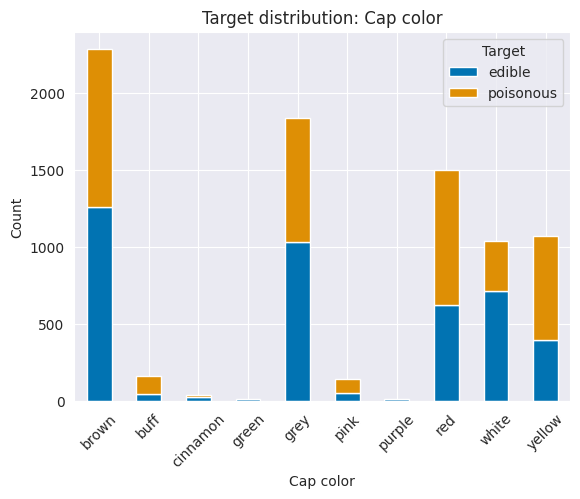

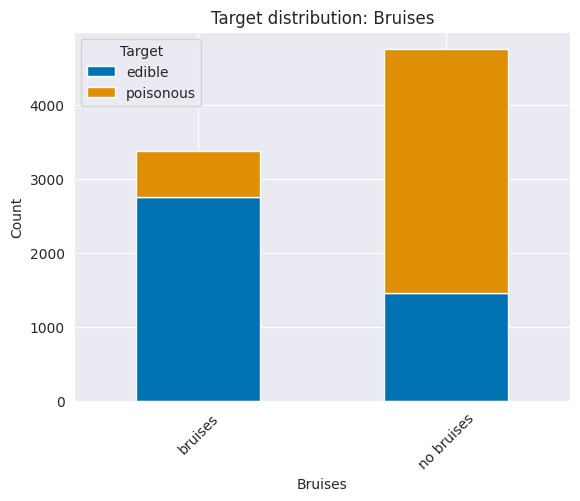

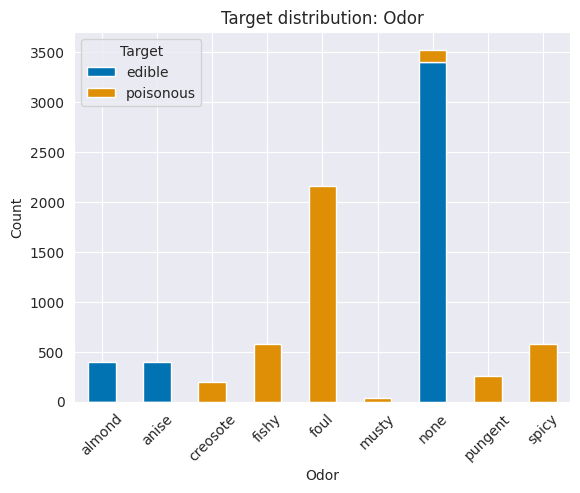

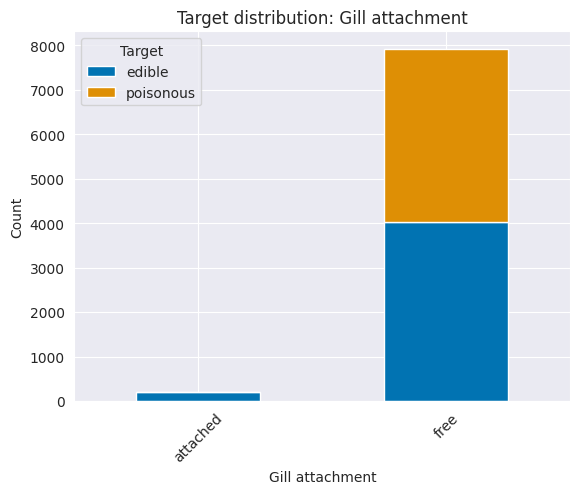

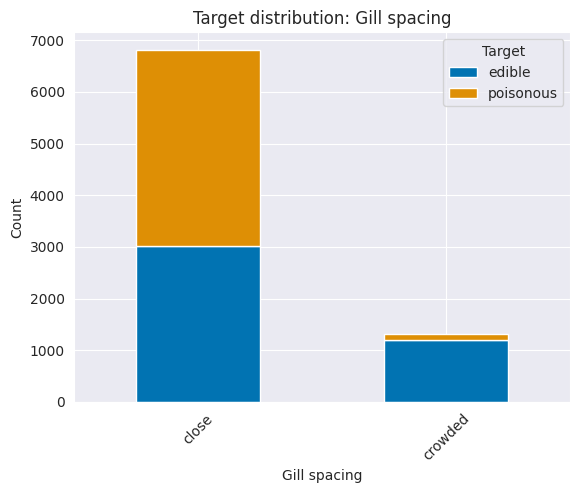

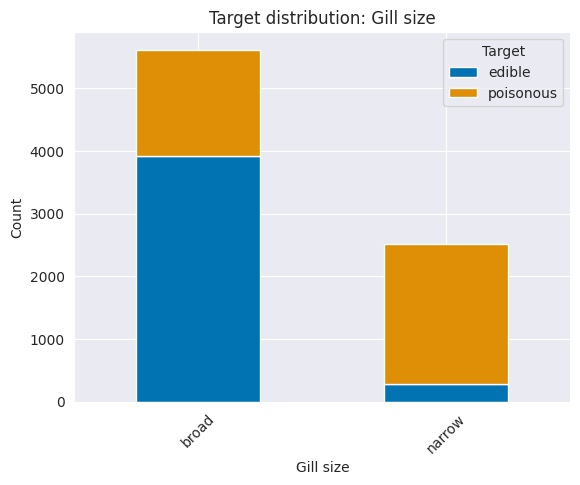

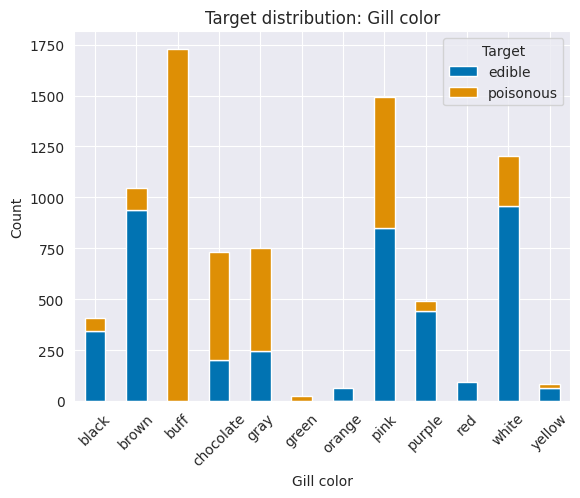

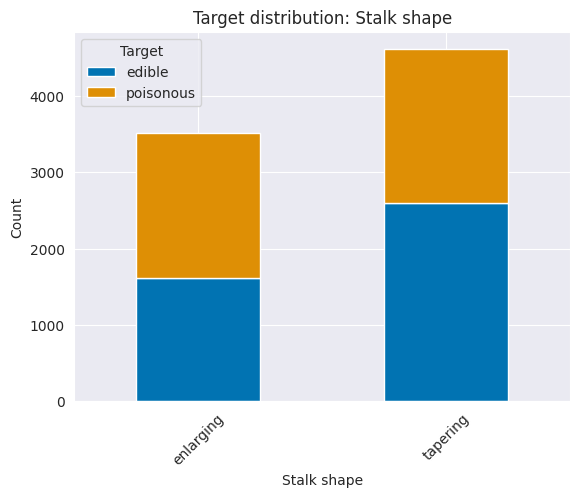

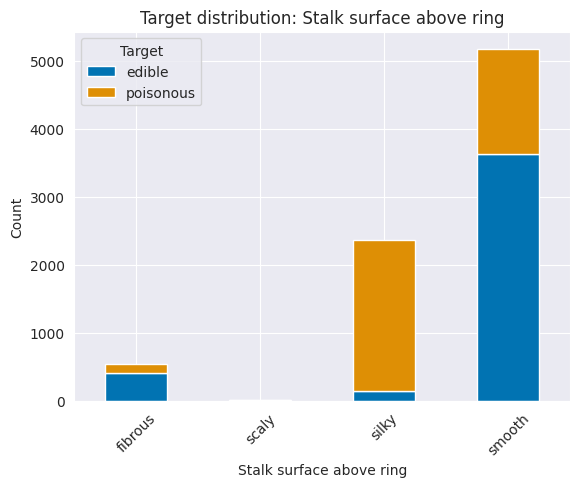

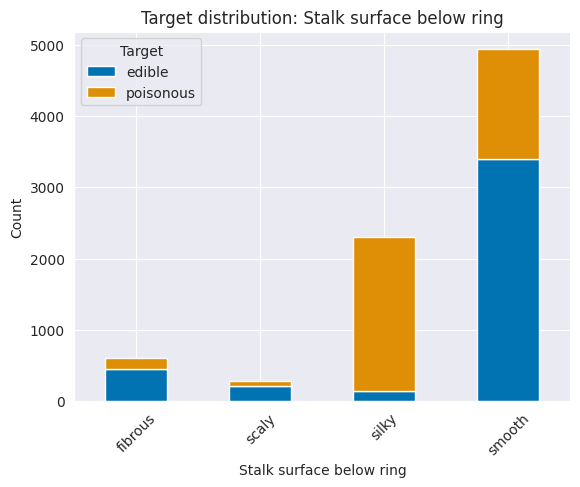

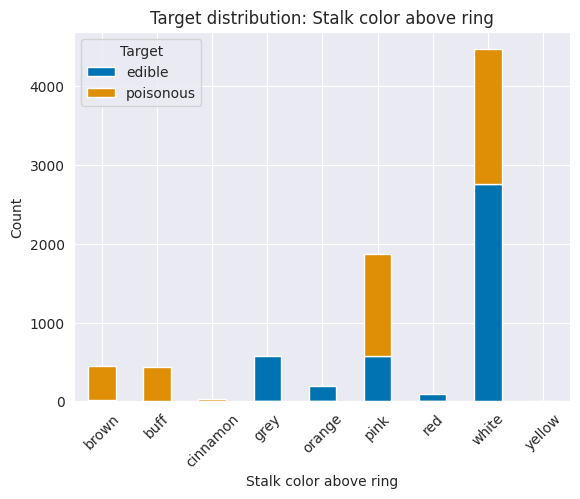

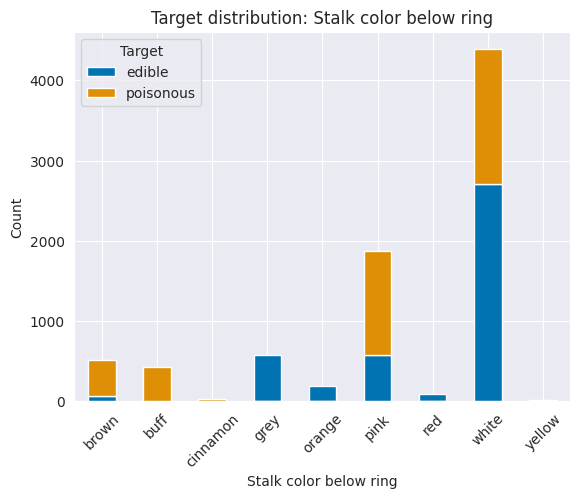

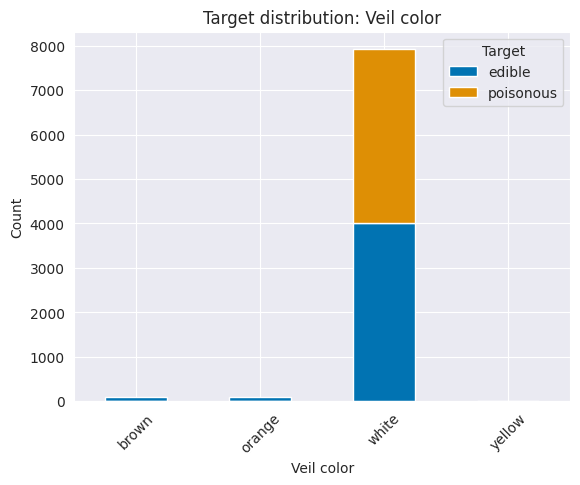

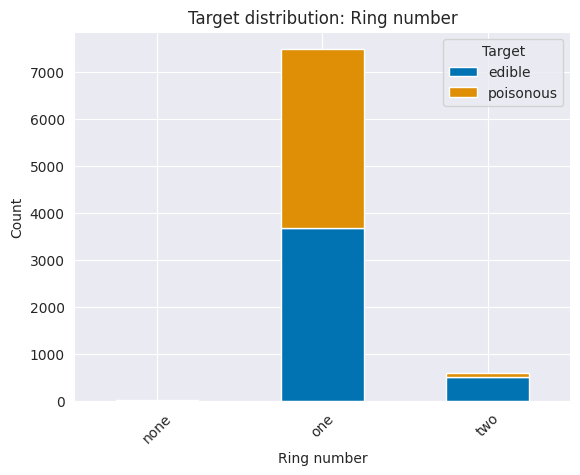

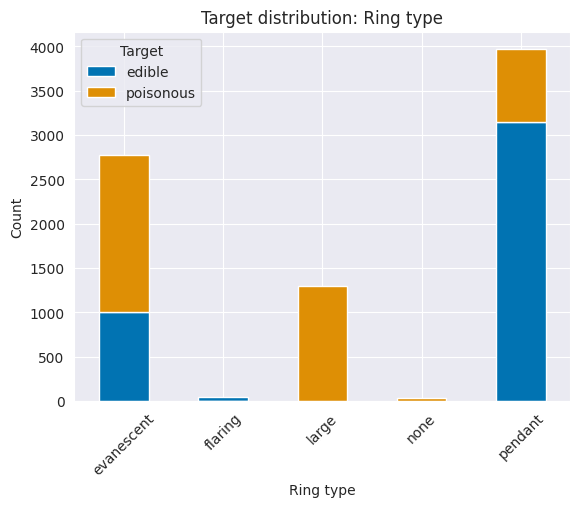

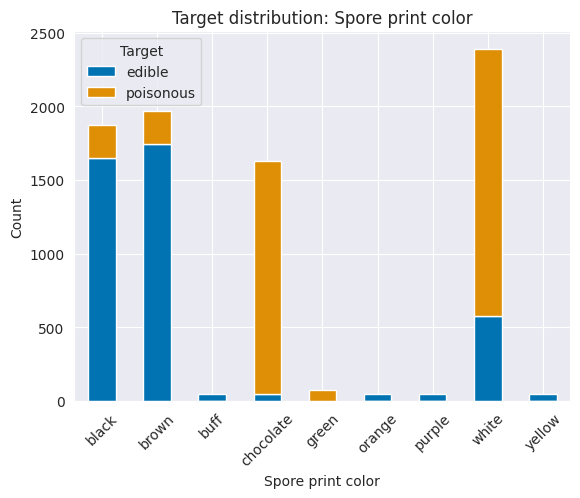

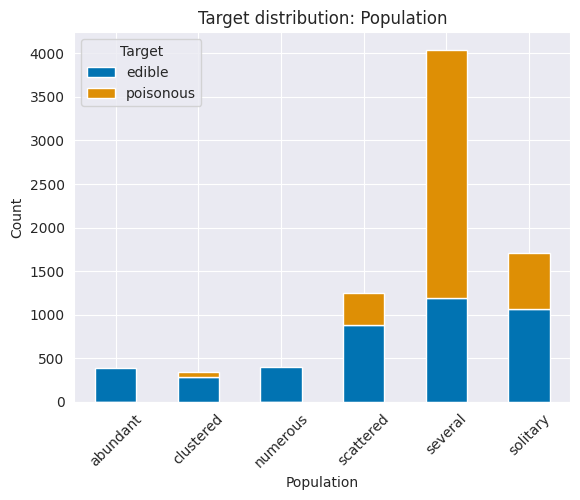

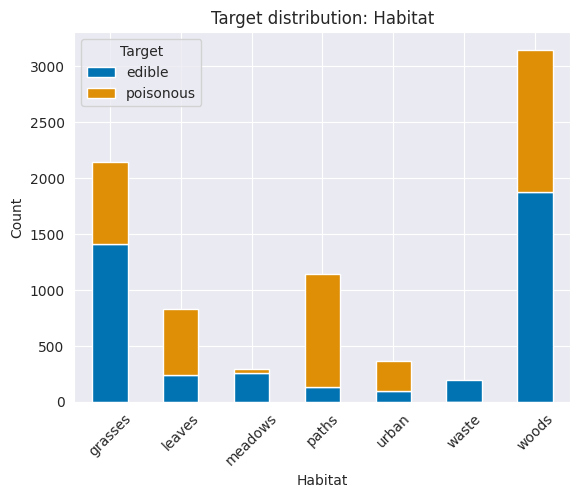

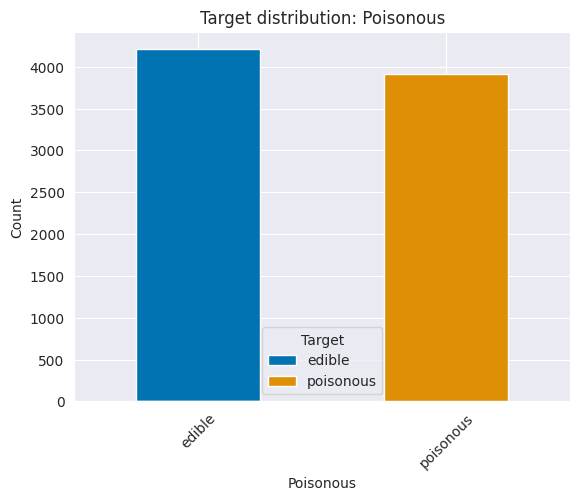

In [ ]:
for col in cols:
    pd.crosstab(df[col], df['Poisonous']).plot(kind='bar', stacked=True)
    plt.title(f'Target distribution: {col.capitalize()}')
    plt.xlabel(f'{col.capitalize()}')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Target')
    plt.show()

These plots highlight some interesting patterns in the data. It appears as though the target variable is relatively evenly distributed across values for target variables.

Of interest though are the 'odor' and 'spore-print-color' variables, where particular values are associated more strongly with one particular target variable. This is indicative of the importance of these features going forwards.

##**5. Data Preparation**

**Categorical feature encoding**

Two different methods for encoding categorical features have been used here:
* One-hot encoding - used for all features (Fawcett, 2024).
* Binary encoding - used to encode the target variable to allow comparisons to be made with model outputs (Fawcett, 2024).

In [ ]:
# Label encoding of the target variable
label_encoder = sklearn.preprocessing.LabelEncoder()

df['Poisonous_binary'] = label_encoder.fit_transform(df['Poisonous'])


# One hot encoding of the features
one_hot_encoder = sklearn.preprocessing.OneHotEncoder(sparse_output=False)

df_target = df['Poisonous_binary']
df_features = df.drop(columns=['Poisonous', 'Poisonous_binary'])

cols = df_features.columns

df_features = one_hot_encoder.fit_transform(df_features)
df_features = pd.DataFrame(df_features, columns=one_hot_encoder.get_feature_names_out(cols))

**Train/test split**

Splitting the processed data into train/test datasets allows the training and testing of models.

In [ ]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(df_features, df_target, test_size=0.3, shuffle=True, random_state=72)

print('x train shape: ' + str(x_train.shape))
print('y train shape: ' + str(y_train.shape))
print('x test shape: ' + str(x_test.shape))
print('y test shape: ' + str(y_test.shape))

x train shape: (5686, 111)
y train shape: (5686,)
x test shape: (2438, 111)
y test shape: (2438,)


##**6. Modelling**

In [ ]:
def model_evaluation_metrics(actual_values, model_results):
  '''
  Function to process the results from model tests. Outputs accuracy, precisison, recall, and F1 scores

  Params:
  actual_values (Data Frame): Target variable that the model is trying to predict from the testing set.
  model_results (array): Results produced from model prediction.
  '''

  print('Model Evaluation Metrics:')
  print('Accuracy: ' + str(sklearn.metrics.accuracy_score(actual_values, model_results)))
  print('Precision: ' + str(sklearn.metrics.precision_score(actual_values, model_results)))
  print('Recall: ' + str(sklearn.metrics.recall_score(actual_values, model_results)))
  print('F1 Score: ' + str(sklearn.metrics.f1_score(actual_values, model_results)))

In [ ]:
def plot_confusion_matrix(model, actual_values, model_results):
  '''
  Function to plot a confusion matrix of the predicted vs actual results following model output.

  Params:
  model (string): String explaining the model used
  actual_values (Data Frame): Target variable that the model is trying to predict from the testing set.
  model_results (array): Results produced from model prediction.
  '''
  cm = sklearn.metrics.confusion_matrix(actual_values, model_results)
  sns.heatmap(data=cm,
            annot=True,
            fmt='g',
            cmap='rocket_r',
            xticklabels=['Edible', 'Poisonous'],
            yticklabels=['Edible', 'Poisonous'],
            cbar=False)
  plt.title(f'Confusion matrix: {model}')
  plt.ylabel('Predicted')
  plt.xlabel('Actual')
  plt.show()

### **Logistic Regression**



Following data preparation, the process of modelling can begin. The first model to be tested is a logistic regression.

Logistic regression models are useful in predicting binary outcomes and are often considered a good choice of model when a simple implementation and explainable method is of high importance (Hosmer *et al.*, 2013).


In [ ]:
log_reg_clf = sklearn.linear_model.LogisticRegression(random_state=72).fit(x_train, y_train)

log_reg_results = log_reg_clf.predict(x_test)

To evaluate the logistic regression model, accuracy, precision, recall, and the f1 score are used.

When considering this particular use case, a high precision metric is particularly important. This is due to the risk of misclassifying a mushroom as edible when it is in fact poisonous.

In [ ]:
model_evaluation_metrics(actual_values=y_test, model_results=log_reg_results)

Model Evaluation Metrics:
Accuracy: 0.9991796554552912
Precision: 1.0
Recall: 0.99830220713073
F1 Score: 0.9991503823279524


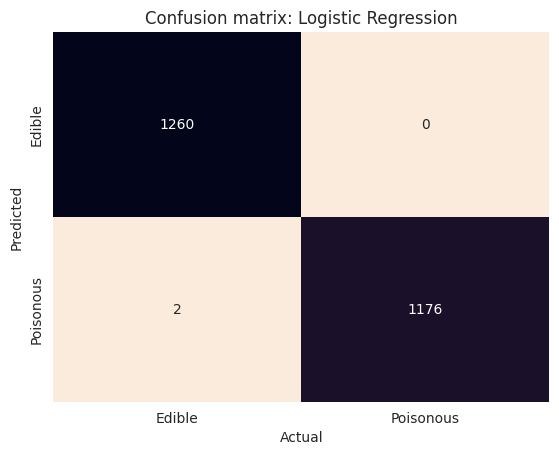

In [ ]:
plot_confusion_matrix('Logistic Regression', actual_values=y_test, model_results=log_reg_results)

From the results produced by fitting the model to test data, we can see that the model performs well against our selected metric of precision, acheiving a score of 1.

Generally, the model performed well across all categories, only misclassifying two mushrooms as poisonous when in fact they were edible. Again, these misclassifications are not of too much concern given that there is no risk to an individual in not foraging a mushroom classified as poisonous when it is in fact edible.

Given the particularly high model performance metrics it is worth being wary of the possibility that the model has overfit to the training data. To evaluate this, K-fold cross validation is used, which evaluates the model against different subsets of the data (Amazon World Service, no date).

In [ ]:
log_reg_cross_val = sklearn.model_selection.cross_val_score(sklearn.linear_model.LogisticRegression(random_state=72), x_train, y_train, cv=10)

print('Cross validation metrics:')
print('Mean accuracy: ' + str(log_reg_cross_val.mean()))
print('Standard Deviation: ' + str(log_reg_cross_val.std()))

Cross validation metrics:
Mean accuracy: 0.9991206465506572
Standard Deviation: 0.001620642627010593


Analysing the cross validation results, the mean accuracy across 10 subsets of the data remains high with low variability suggesting that the model is not overfitting.

To develop an understanding of which features are the most useful in predicting whether a mushroom is edible or not, logistic regression coefficients are analysed (Bock, no date).

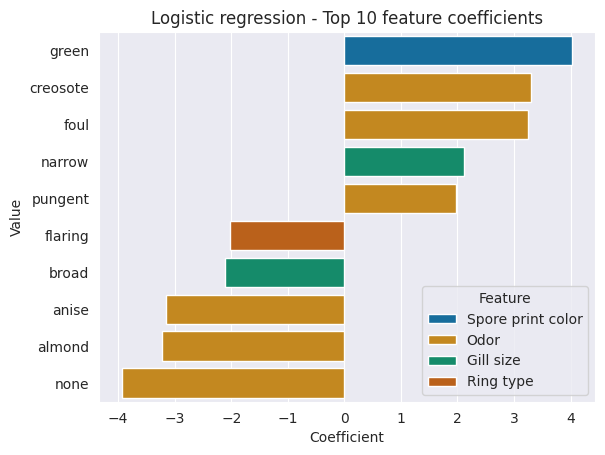

In [ ]:
coef = log_reg_clf.coef_[0]
features = x_train.columns

log_reg_post_process = pd.DataFrame({'Feature': features, 'Coefficient': coef})
log_reg_top_features = pd.concat([log_reg_post_process.nlargest(5, 'Coefficient'), log_reg_post_process.nsmallest(5, 'Coefficient')]).sort_values(by='Coefficient', ascending=False)

log_reg_top_split = log_reg_top_features['Feature'].str.split('_', expand=True)
log_reg_top_split.columns = ['Feature', 'Value']
log_reg_top_split['Coefficient'] = log_reg_top_features['Coefficient']

sns.barplot(x='Coefficient', y='Value', data=log_reg_top_split, hue='Feature', legend=True)
plt.title('Logistic regression - Top 10 feature coefficients')
plt.xlabel('Coefficient')
plt.ylabel('Value')
plt.legend(title='Feature', loc='lower right')
plt.show()

From the plot, it is evident that odour in particular is a strong predictor of the edibility of a mushroom, appearing six times in the top 10 feature coefficients. This aligns with what we would expect from the earlier pairwise relationship plots.

Gill size also appears to be an important feature, with both possible values (b and n) represented in this plot. Interestingly, this was not necessarily a feature that was identified in the pairwise relationship plots.

### **Decision Tree**

Decision trees are an alternative classification method, that are suited to both binary and multi-target problems. Their strengths lie in the fact that they are robust in dealing with data irregularities and the ability to breakdown complex data into groups, improving model explainability (Song and Ying, 2015).

In [ ]:
tree_clf = sklearn.tree.DecisionTreeClassifier(random_state=72).fit(x_train, y_train)

tree_results = tree_clf.predict(x_test)

In [ ]:
model_evaluation_metrics(actual_values=y_test, model_results=tree_results)

Model Evaluation Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


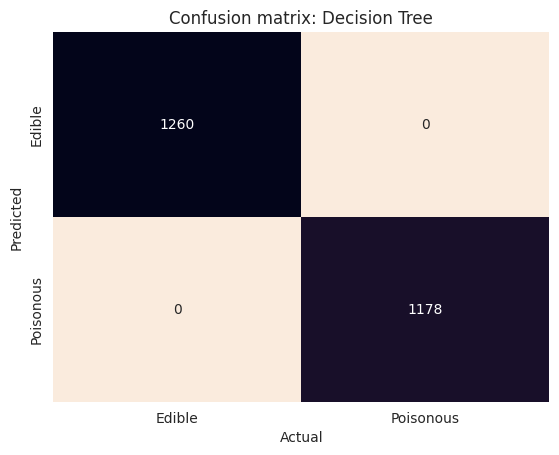

In [ ]:
plot_confusion_matrix('Decision Tree', actual_values=y_test, model_results=tree_results)

Again, the model evaluation metric of highest importance in this scenario is precision. In this scenario, the decision tree not only has a precision of 1 but improves on other metrics when compared with the logistic regression model, classifying all observations correctly.

This does raise some concerns of overfitting, particularly given that decision trees are known to be prone to overfitting (Song and Ying, 2015).

In [ ]:
tree_cross_val = sklearn.model_selection.cross_val_score(sklearn.tree.DecisionTreeClassifier(random_state=72), x_train, y_train, cv=10)

print('Cross validation metrics:')
print('Mean accuracy: ' + str(tree_cross_val.mean()))
print('Standard Deviation: ' + str(tree_cross_val.std()))

Cross validation metrics:
Mean accuracy: 0.9998239436619718
Standard Deviation: 0.000528169014084523


However, evaluating the cross-validation metrics, it does not appear that overfitting is a problem with a very high mean accuracy and little variability.

To further understand the decision tree output, branching structure and feature importance are evaluated (Misra, 2023; Gupta, 2022).

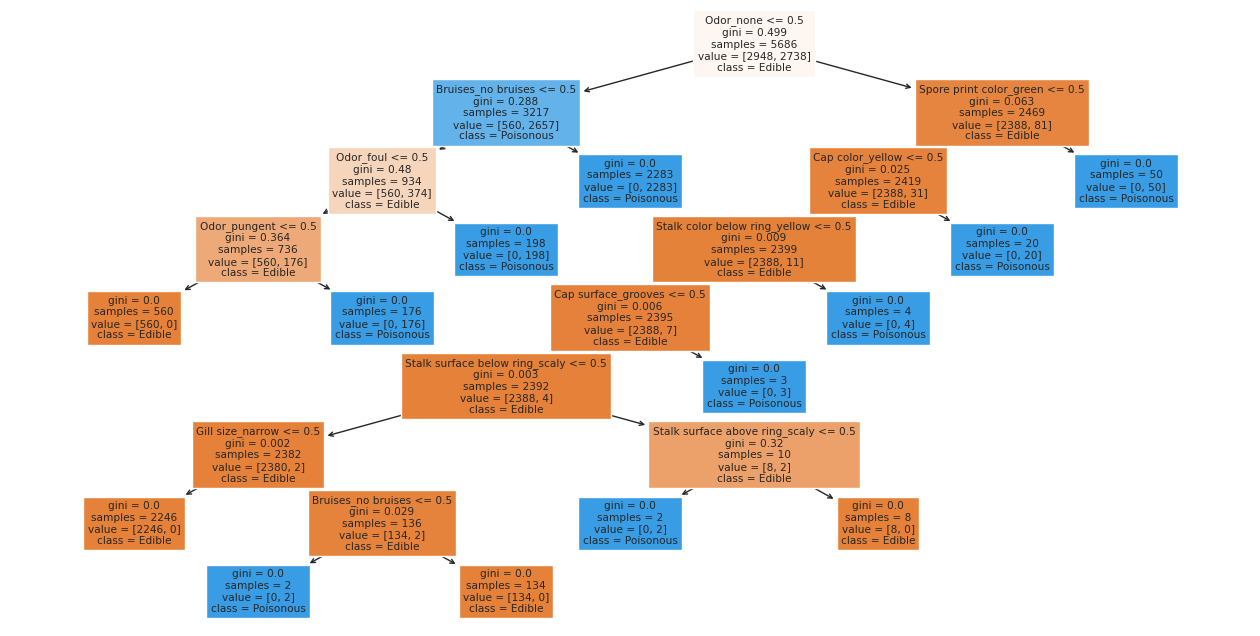

In [ ]:
plt.figure(figsize=(16,8))
sklearn.tree.plot_tree(tree_clf, feature_names=features, class_names=['Edible', 'Poisonous'], filled=True)
plt.show()

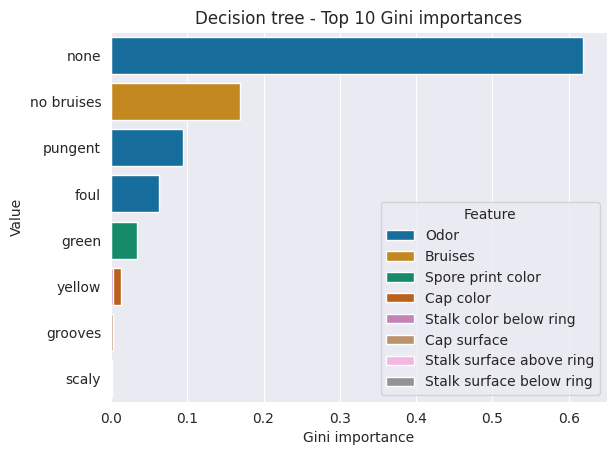

In [ ]:
feature_importance = tree_clf.feature_importances_

tree_post_process = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
tree_top_features = tree_post_process.nlargest(10, 'Importance')

tree_top_split = tree_top_features['Feature'].str.split('_', expand=True)
tree_top_split.columns = ['Feature', 'Value']
tree_top_split['Importance'] = tree_top_features['Importance']

sns.barplot(x='Importance', y='Value', data=tree_top_split, hue='Feature', legend=True, dodge=False)
plt.title('Decision tree - Top 10 Gini importances')
plt.xlabel('Gini importance')
plt.ylabel('Value')
plt.show()

In this decision tree, odour is once again a strong predictor of mushroom edibility, followed by bruises and spore print colour. It is worth noting that there are many features with importances of close to zero, suggesting that it may be possible to simplify the model with feature reduction.

### **Neural Network (Multi-layer perceptron)**

Multi-layer perceptron's are some of the most commonly used neural networks for tackling classification problems. They are often selected for complex tasks which require interpretation of both linear and non-linear data (Taud and Mas, 2018).  

In [ ]:
mlp_clf = sklearn.neural_network.MLPClassifier(random_state=72).fit(x_train, y_train)

mlp_results = mlp_clf.predict(x_test)

In [ ]:
model_evaluation_metrics(actual_values=y_test, model_results=mlp_results)

Model Evaluation Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


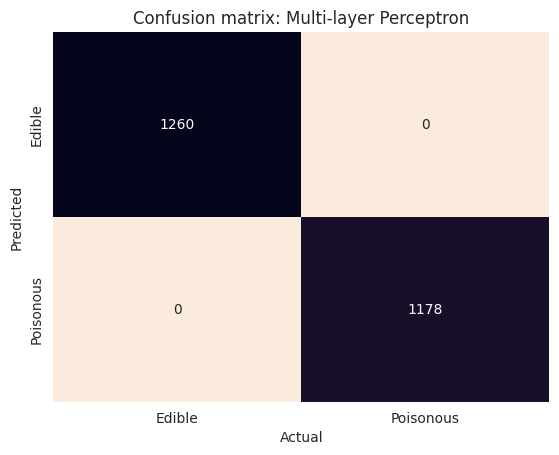

In [ ]:
plot_confusion_matrix('Multi-layer Perceptron', actual_values=y_test, model_results=mlp_results)

Identical to the results seen from the decision tree, the multi-layer perceptron model classifies every observation correctly, suggesting that it is effective for the task of classifying the edibility of mushrooms.

Given the results seen here it is worth checking for the possibility that the model has overfit to the training data.

In [ ]:
mlp_cross_val = sklearn.model_selection.cross_val_score(sklearn.neural_network.MLPClassifier(random_state=72), x_train, y_train, cv=10)

print('Cross validation metrics:')
print('Mean accuracy: ' + str(mlp_cross_val.mean()))
print('Standard Deviation: ' + str(mlp_cross_val.std()))

Cross validation metrics:
Mean accuracy: 1.0
Standard Deviation: 0.0


With a mean accuracy of 1 across a 10 fold cross validation, it is likely that the model has not overfit to the training data.

Although it can be more difficult to explain the output of a neural network when compared with logistic regression and decision tree models, we can still analyse feature importance by using permutation (Hardy, 2020).

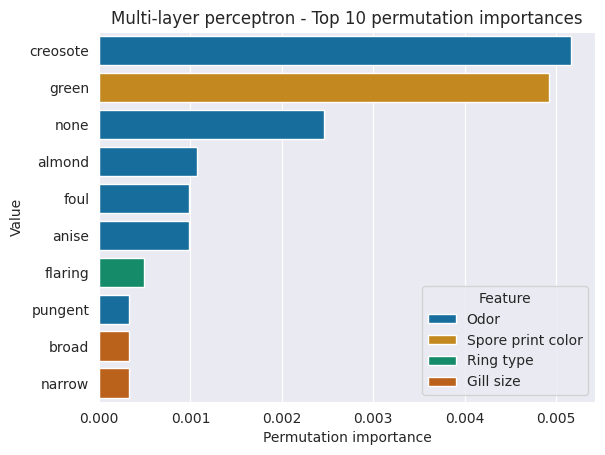

In [ ]:
mlp_permutation = sklearn.inspection.permutation_importance(mlp_clf, x_test, y_test, scoring='accuracy')
mlp_importances = mlp_permutation.importances_mean

mlp_post_process = pd.DataFrame({'Feature': features, 'Importance': mlp_importances})

mlp_top_features = mlp_post_process.nlargest(10, 'Importance')

mlp_top_split = mlp_top_features['Feature'].str.split('_', expand=True)
mlp_top_split.columns = ['Feature', 'Value']
mlp_top_split['Importance'] = mlp_top_features['Importance']

sns.barplot(x='Importance', y='Value', data=mlp_top_split, hue='Feature', legend=True)
plt.title('Multi-layer perceptron - Top 10 permutation importances')
plt.xlabel('Permutation importance')
plt.ylabel('Value')
plt.show()

Once again, odour, spore print colour and gill size are all recognised as important features required for predicting mushroom edibility.

##**7. Conclusions**

### **Addressing the research question**

This project demonstrates the effectiveness of machine learning classification methods in determining the edibility of mushrooms based on their morphological characteristics. All models showed promise in this domain, achieving high accuracy and precision scores. The choice of model for further development would depend on user requirements, such as available computational resource and need for interpretability.

Odour and spore print colour presented as the two most important features for predicting edibility, aligning with the literature on the use of odour to differentiate mushroom species (Boniface, 2020). Although spore print colour is less frequently used as a predictor, possibly due to the extra step of producing prints, the importance highlighted here suggests it is worth considering for foragers (Storey, 2005).





###**Future work & improvements**

Future work could involve expand the dataset to include more mushroom species. Additionally, model deployment could be explored, along with user research, to understand how classification could be useful to practicing foragers.

##**8. Biliography/References**

* Amazon World Service (no date) What is Overfitting? Available at: https://aws.amazon.com/what-is/overfitting/#:~:text=A%20high%20error%20rate%20in,for%20overfitting%20is%20given%20below.&text=Cross%2Dvalidation%20is%20one%20of,or%20sample%20sets%20called%20folds. (Accessed: 7 August 2024).

* Bock, Tim. (no date) How to interpret logistic regression coefficients. Available at: https://www.displayr.com/how-to-interpret-logistic-regression-coefficients/ (Accessed: 7 August 2024).

* Boniface, T. (2020) The use of odours in the identification of mushrooms and toadstools. Field Mycology. 21(1), 28-30.

* Bunyard, B., Lynch, T. (2020) The Beginner's Guide to Mushrooms: Everything You Need to Know, from Foraging to Cultivating. Quarry Books.

* Fawcett, A. (2024) Data Science in 5 Minutes: What is One Hot Encoding? Available at: https://www.educative.io/blog/one-hot-encoding (Accessed: 5 August 2024).

* González, A., Cruz, M., Losoya, C., Nobre, C., Loredo, A., Rodríguez, R., Contreras, J., Belmares, R. (2020) Edible mushrooms as a novel protein source for functional foods. Food & function, 11(9), 7400-7414.

* Government Data Quality Hub (2020) The Government Data Quality Framework. Available at: https://www.gov.uk/government/publications/the-government-data-quality-framework/the-government-data-quality-framework (Accessed 5 August 2024).

* Gupta, M. (2022) How feature importance is calculated in Decision Trees? with example. Data Science in your pocket. Available at: https://medium.com/data-science-in-your-pocket/how-feature-importance-is-calculated-in-decision-trees-with-example-699dc13fc078 (Accessed: 7 August 2024).

* Hardy, R. (2020) Estimating feature importance, the easy way. Medium. Available at: https://romainlhardy.medium.com/estimating-feature-importance-the-easy-way-2ebe970c600c (Accessed: 7 August 2024).

* He, M.Q., Wang, M.Q., Chen, Z.H., Deng, W.Q., Li, T.H., Vizzini, A., Jeewon, R., Hyde, K.D., Zhao, R.L. (2022) Potential benefits and harms: A review of poisonous mushrooms in the world. Fungal Biology Reviews. 42, 56-68.

* Hosmer Jr, D.W., Lemeshow, S., Sturdivant, R.X. (2013) Applied logistic regression. John Wiley & Sons.

* Kumar, K. (2015) Role of edible mushrooms as functional foods — a review. South Asian Journal of Food Technology and Environment. 1(3&4), 211-218.

* Marquina, T., Emery, M., Hurley, P. and Gould, R.K. (2022) The ‘quiet hunt’: the significance of mushroom foraging among Russian-speaking immigrants in New York City. Ecosystems and People. 18(1), 226-240.

* Misra, S. (2023) Interpretable AI: Decision Trees. Medium. Available at: https://medium.com/@shrutimisra/interpretable-ai-decision-trees-f9698e94ef9b (Accessed: 7 August 2024).

* Pouliot, A., May, T. (2021) Wild mushrooming: a guide for foragers. Csiro Publishing.

* Song, Y.Y. and Ying, L.U. (2015) Decision tree methods: applications for classification and prediction. Shanghai archives of psychiatry. 27(2), 130.

* Stephenson, K., 2022. Beginner's Guide to Safely Foraging for Wild Mushrooms: Identifying and Collecting Mushrooms Sustainably with Confidence. Sourcebooks, Inc..

* Storey, M. (2005) Making spore prints. Field Mycology. 6(3), 104-106.

* Svanberg, I., Lindh, H. (2019) Mushroom hunting and consumption in twenty-first century post-industrial Sweden. Journal of ethnobiology and ethnomedicine. 15, 1-23.

* Taud, H., Mas, J.F. (2018) Multilayer perceptron (MLP). Geomatic approaches for modeling land change scenarios. 451-455.

* UC Irvine Machine Learning Repository (1987) 'Mushroom'. Available at: https://archive.ics.uci.edu/dataset/73/mushroom (Accessed 9 July 2024).

* Varga, T., Krizsán, K., Földi, C., Dima, B., Sánchez-García, M., Sánchez-Ramírez, S., Szöllősi, G.J., Szarkándi, J.G., Papp, V., Albert, L., Andreopoulos, W. (2019) Megaphylogeny resolves global patterns of mushroom evolution. Nature ecology & evolution. 3(4), 668-678.

* Wasser, S.P. (2010) Medicinal mushroom science: history, current status, future trends, and unsolved problems. International journal of medicinal mushrooms. 12(1).